# PyCaret　オープンソースの「AutoML」

In [1]:
!pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 449.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 807.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.

In [2]:
import warnings
# 不要な警告文非表示
warnings.filterwarnings("ignore")
from pycaret.classification import *
from sklearn.datasets import load_iris
import pandas as pd

In [3]:
from pycaret.datasets import get_data
dataset = get_data("credit")
dataset.shape

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


(24000, 24)

In [4]:
clf = setup(data=dataset, target="default", session_id=0)

,Description,Value
0,Session id,0
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8200,0.7785,0.3611,0.6746,0.4698,0.3732,0.4000,3.7710
catboost,CatBoost Classifier,0.8185,0.7779,0.3697,0.6602,0.4733,0.3741,0.3974,9.8000
lightgbm,Light Gradient Boosting Machine,0.8171,0.7724,0.3565,0.6603,0.4624,0.3640,0.3894,0.3770
ada,Ada Boost Classifier,0.8165,0.7690,0.3247,0.6782,0.4387,0.3450,0.3787,0.7660
rf,Random Forest Classifier,0.8149,0.7613,0.3657,0.6438,0.4657,0.3641,0.3857,2.6330
et,Extra Trees Classifier,0.8111,0.7564,0.3651,0.6248,0.4601,0.3553,0.3744,1.8650
xgboost,Extreme Gradient Boosting,0.8108,0.7572,0.3638,0.6242,0.4591,0.3541,0.3734,1.7780
lda,Linear Discriminant Analysis,0.8101,0.7192,0.2520,0.6947,0.3692,0.2853,0.3366,0.1080
ridge,Ridge Classifier,0.7989,0.0000,0.1467,0.7267,0.2436,0.1828,0.2625,0.1100
lr,Logistic Regression,0.7789,0.6468,0.0000,0.0000,0.0000,0.0000,0.0000,0.5770


In [7]:
# 予測モデルの作成(Gradient Boosting Classifierを選択)
dt = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8244,0.7893,0.3639,0.6959,0.4779,0.3845,0.4138
1,0.8238,0.7682,0.3747,0.6847,0.4843,0.3889,0.4146
2,0.8167,0.7770,0.3558,0.6567,0.4615,0.3626,0.3874
3,0.8208,0.7971,0.3558,0.6804,0.4673,0.3720,0.4003
4,0.8256,0.7644,0.4043,0.6757,0.5059,0.4080,0.4279
5,0.8232,0.7828,0.3558,0.6947,0.4706,0.3775,0.4080
6,0.8042,0.7521,0.3414,0.6019,0.4357,0.3280,0.3473
7,0.8339,0.7766,0.3844,0.7409,0.5062,0.4182,0.4508
8,0.8155,0.8023,0.3065,0.6867,0.4238,0.3326,0.3711


In [8]:
#モデルのハイパーパラーメーターチューニング
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8190,0.7906,0.3261,0.6914,0.4432,0.3514,0.3869
1,0.8214,0.7682,0.3504,0.6878,0.4643,0.3704,0.4008
2,0.8167,0.7776,0.3342,0.6703,0.4460,0.3506,0.3811
3,0.8107,0.7952,0.3046,0.6532,0.4154,0.3199,0.3531
4,0.8226,0.7604,0.3908,0.6682,0.4932,0.3945,0.4154
5,0.8131,0.7758,0.3315,0.6508,0.4393,0.3411,0.3690
6,0.7994,0.7439,0.3038,0.5916,0.4014,0.2956,0.3193
7,0.8268,0.7758,0.3387,0.7368,0.4641,0.3772,0.4179
8,0.8143,0.8008,0.2849,0.6974,0.4046,0.3168,0.3615


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [9]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
# モデル予測結果の確認
pred_result = predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8246,0.7780,0.3712,0.6928,0.4834,0.3892,0.4167


In [40]:
dataset = get_data("credit")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [42]:
exp = setup(data=dataset, target='default')

,Description,Value
0,Session id,5965
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [43]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8204,0.7775,0.3578,0.6776,0.4679,0.3722,0.3998,2.8730
lightgbm,Light Gradient Boosting Machine,0.8196,0.7729,0.3573,0.6736,0.4666,0.3702,0.3973,0.4830
catboost,CatBoost Classifier,0.8189,0.7726,0.3622,0.6669,0.4689,0.3712,0.3966,11.2860
ada,Ada Boost Classifier,0.8179,0.7699,0.3290,0.6833,0.4437,0.3506,0.3843,0.8160
rf,Random Forest Classifier,0.8130,0.7579,0.3546,0.6396,0.4559,0.3541,0.3767,2.7690
lda,Linear Discriminant Analysis,0.8100,0.7113,0.2402,0.7074,0.3577,0.2771,0.3333,0.1240
xgboost,Extreme Gradient Boosting,0.8089,0.7503,0.3506,0.6200,0.4476,0.3427,0.3632,1.7830
et,Extra Trees Classifier,0.8064,0.7483,0.3516,0.6081,0.4452,0.3380,0.3568,2.7530
ridge,Ridge Classifier,0.7972,0.0000,0.1333,0.7282,0.2247,0.1678,0.2500,0.1080
dummy,Dummy Classifier,0.7789,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0860


In [44]:
best_model = automl()

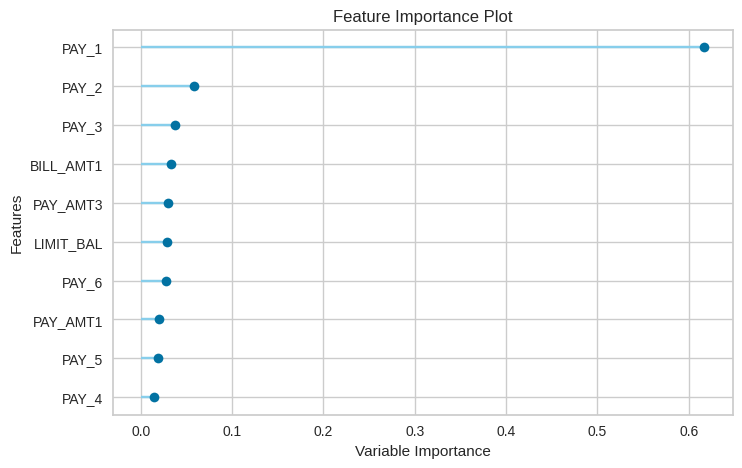

In [47]:
plot_model(best_model, plot='feature')